# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [2]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
sales = pd.read_csv('C:\\Users\\ievav\\OneDrive\\Documents\\Ironhack\\Assignments\\ironhack-lab-unsupervised-learning\\data\\Wholesale customers data.csv')
sales.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [6]:
print(sales.describe())
print(sales.dtypes)
census.isnull().sum(axis = 0)

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

NameError: name 'census' is not defined

<Axes: >

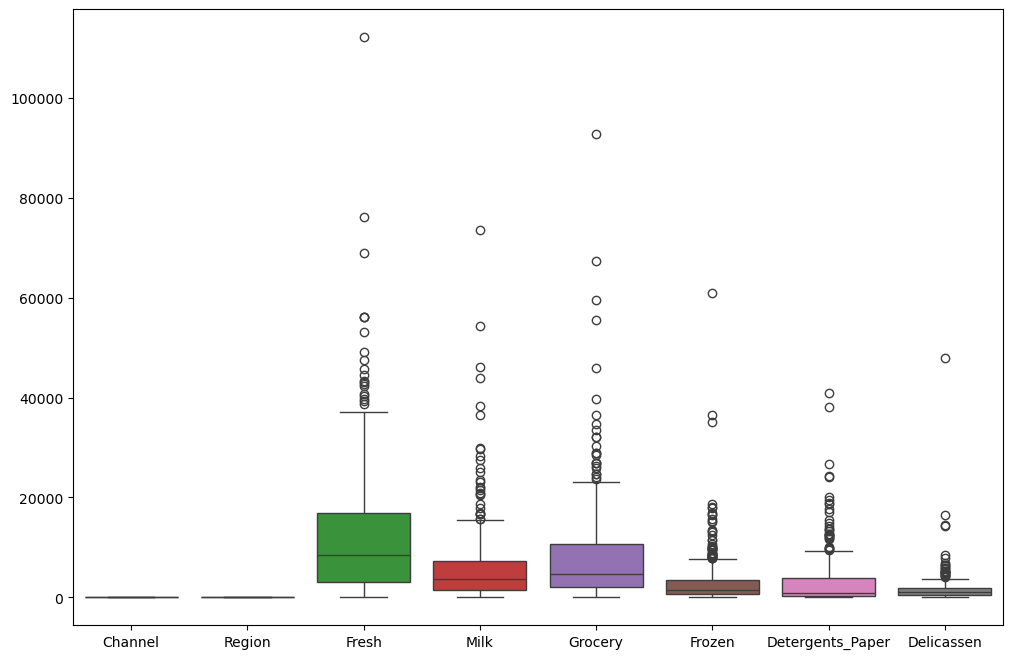

In [8]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(data=sales)

array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

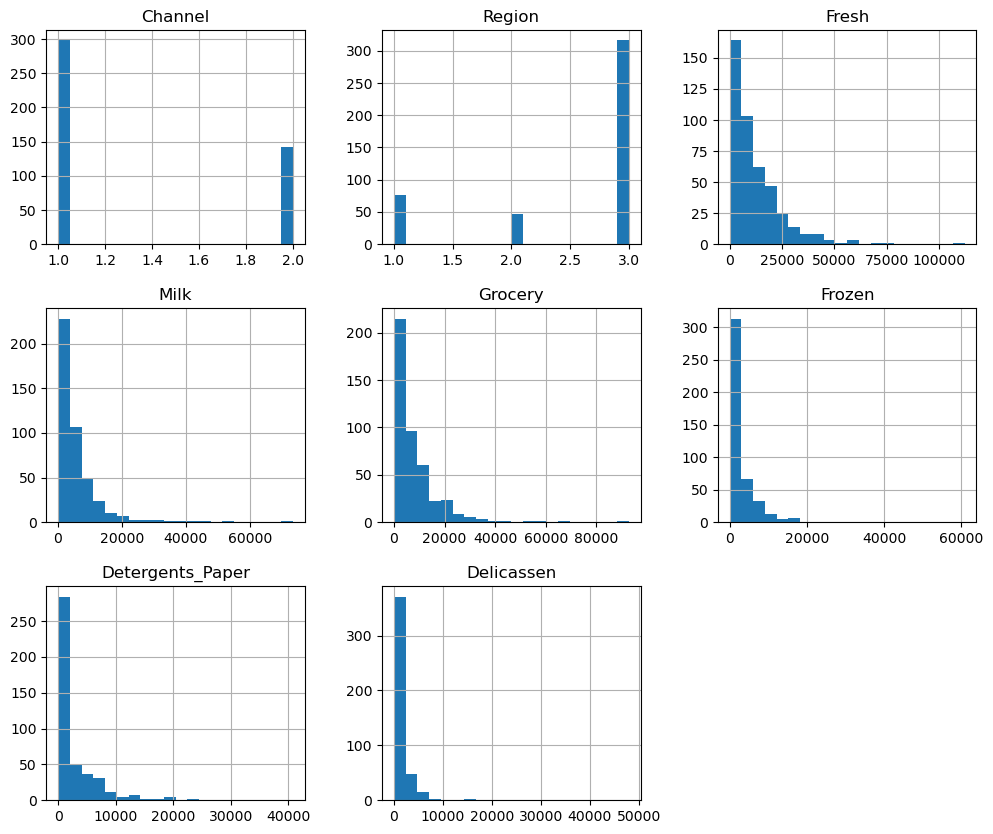

In [12]:
sales.hist(bins=20, figsize=(12, 10)) 


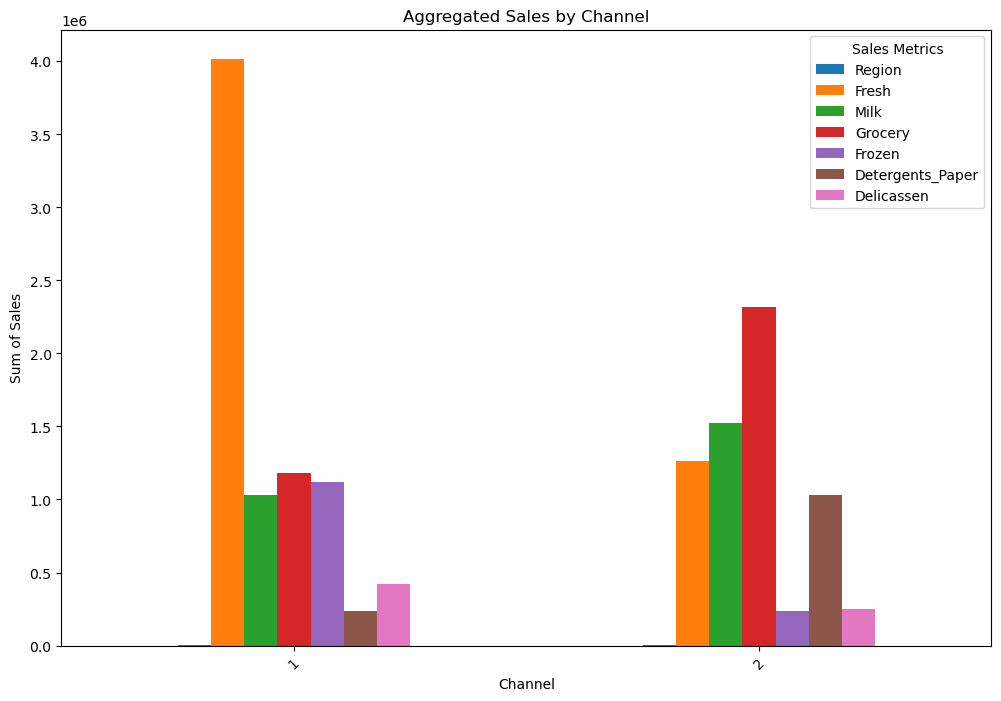

In [13]:

# Group the data by 'Channel' and 'Region', summing all other columns
grouped_sales = sales.groupby(['Channel']).sum()

# Plot each aggregated column in a bar plot
grouped_sales.plot(kind='bar', figsize=(12, 8))
plt.title('Aggregated Sales by Channel')
plt.ylabel('Sum of Sales')
plt.xlabel('Channel')
plt.xticks(rotation=45)
plt.legend(title="Sales Metrics")
plt.show()

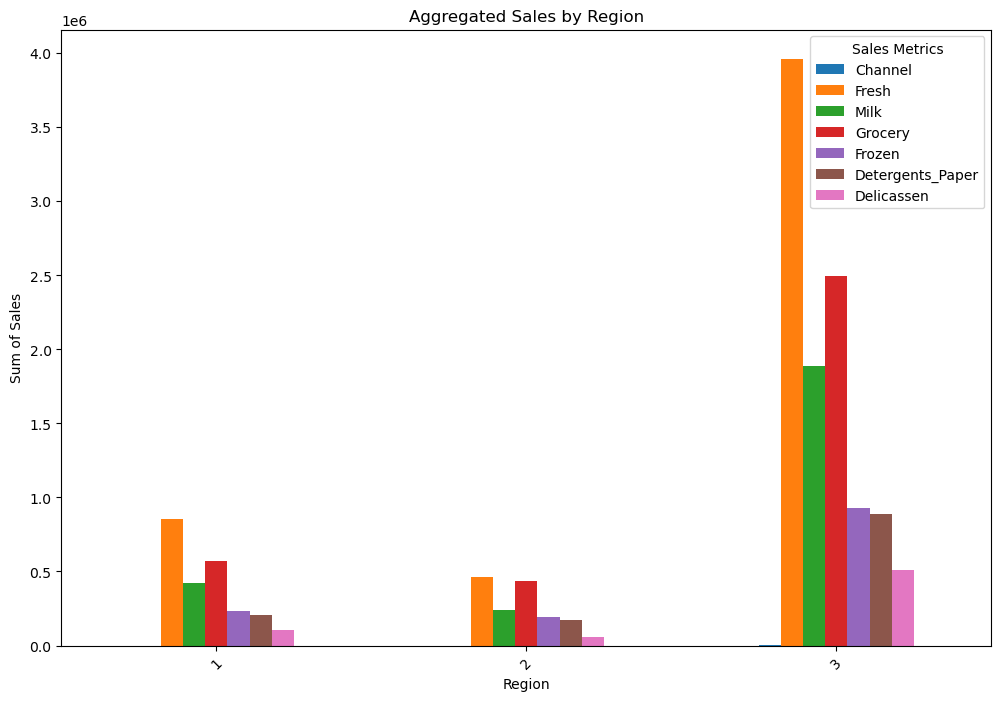

In [13]:

# Group the data by 'Channel' and 'Region', summing all other columns
grouped_sales_region = sales.groupby(['Region']).sum()

# Plot each aggregated column in a bar plot
grouped_sales_region.plot(kind='bar', figsize=(12, 8))
plt.title('Aggregated Sales by Region')
plt.ylabel('Sum of Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title="Sales Metrics")
plt.show()

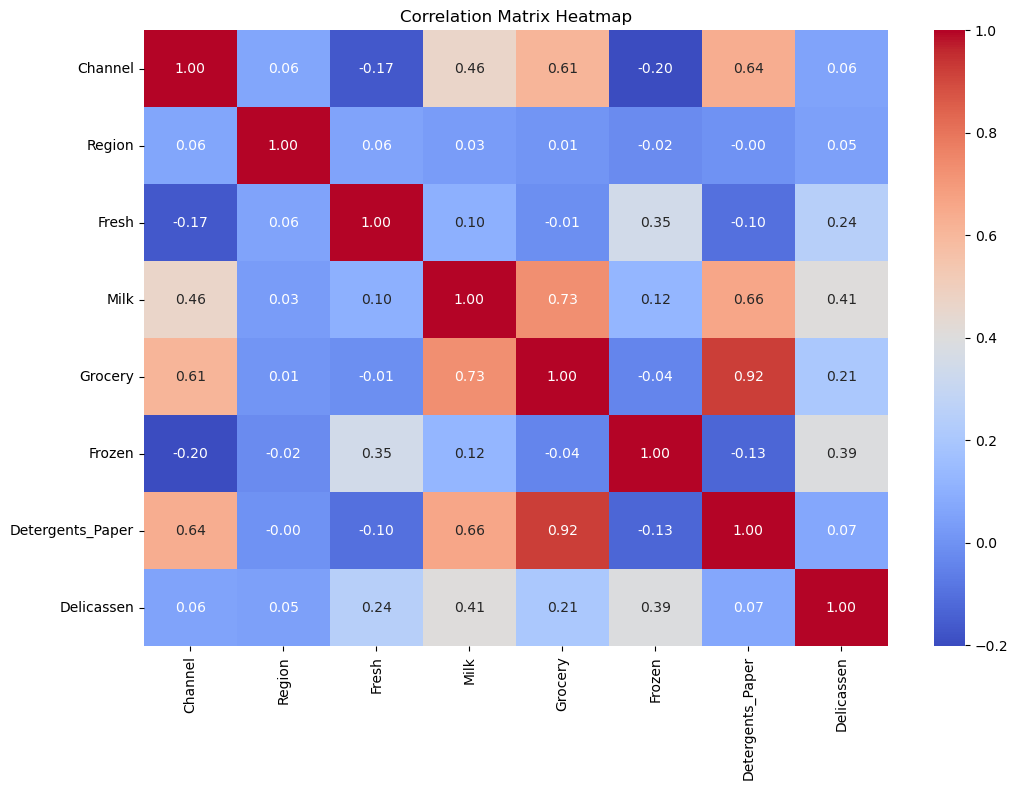

In [16]:
correlation_matrix = sales.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Tus observaciones aquí**

+ Grocery and deteregnts paper has high correlation
+ Detergent papers have most strong correlations
+ Channel and Region are categorical
+ all non-categorical values have some outliers that I would consider removing at later stages
+ most data is right skewed



# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [22]:
# Your code here


**Tus observaciones aquí**

+ Parece que...
+ 
+ 

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [27]:
from sklearn.preprocessing import StandardScaler

X = sales.drop(columns=['Region', 'Channel'])

customers_scaled = StandardScaler().fit_transform(X)

# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [30]:
from sklearn.cluster import KMeans

# Initialize the KMeans model and fit to the scaled data
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers_scaled)

# Assign the cluster labels to the customers DataFrame
sales['Labels'] = kmeans.labels_

# Check the first few rows to confirm
print(sales.head(20))

    Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0         2       3  12669   9656     7561     214              2674   
1         2       3   7057   9810     9568    1762              3293   
2         2       3   6353   8808     7684    2405              3516   
3         1       3  13265   1196     4221    6404               507   
4         2       3  22615   5410     7198    3915              1777   
5         2       3   9413   8259     5126     666              1795   
6         2       3  12126   3199     6975     480              3140   
7         2       3   7579   4956     9426    1669              3321   
8         1       3   5963   3648     6192     425              1716   
9         2       3   6006  11093    18881    1159              7425   
10        2       3   3366   5403    12974    4400              5977   
11        2       3  13146   1124     4523    1420               549   
12        2       3  31714  12319    11757     287              

C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

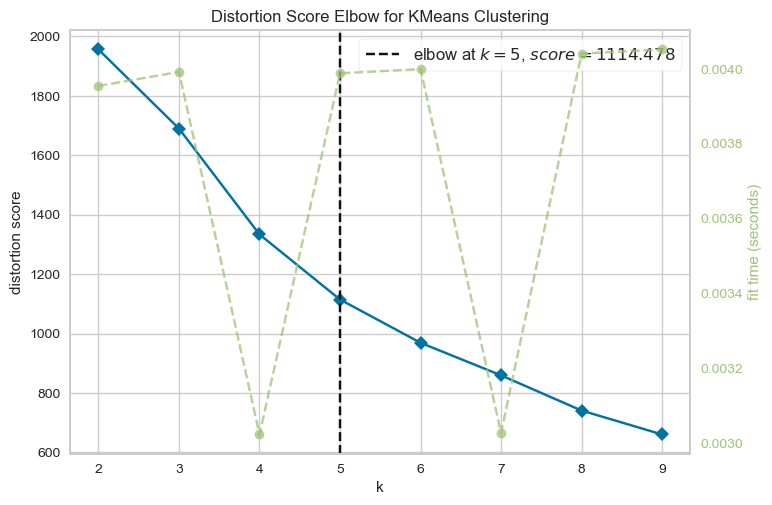

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KElbowVisualizer with the KMeans model
# k=(2,10) indicates the range of number of clusters to try (from 2 to 10)
visualizer = KElbowVisualizer(kmeans, k=(2,10))

# Fit the visualizer to the data
# This will run K-means clustering for each value of k and calculate the distortion score for each
visualizer.fit(customers_scaled)

# Render the plot
# The Elbow plot displays the distortion score for each k
# The point where the distortion score starts to level off ('elbow') is the recommended number of clusters
visualizer.show()

Cuenta los valores en `labels`.

In [53]:
sales['Labels'].unique()

array([0, 3, 2, 1])

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [55]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)
sales['labels_DBSCAN'] = dbscan.fit_predict(customers_scaled)

# Check the first few rows to confirm
print(sales.head(10))


   Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669   9656     7561     214              2674   
1        2       3   7057   9810     9568    1762              3293   
2        2       3   6353   8808     7684    2405              3516   
3        1       3  13265   1196     4221    6404               507   
4        2       3  22615   5410     7198    3915              1777   
5        2       3   9413   8259     5126     666              1795   
6        2       3  12126   3199     6975     480              3140   
7        2       3   7579   4956     9426    1669              3321   
8        1       3   5963   3648     6192     425              1716   
9        2       3   6006  11093    18881    1159              7425   

   Delicassen  Labels  Label  labels_DBSCAN  
0        1338       0      0              0  
1        1776       0      0              0  
2        7844       0      0             -1  
3        1788       0      0      

Cuenta los valores en `labels_DBSCAN`.

In [59]:
sales['labels_DBSCAN'].value_counts()

labels_DBSCAN
 0    261
-1    174
 1      5
Name: count, dtype: int64

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [63]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

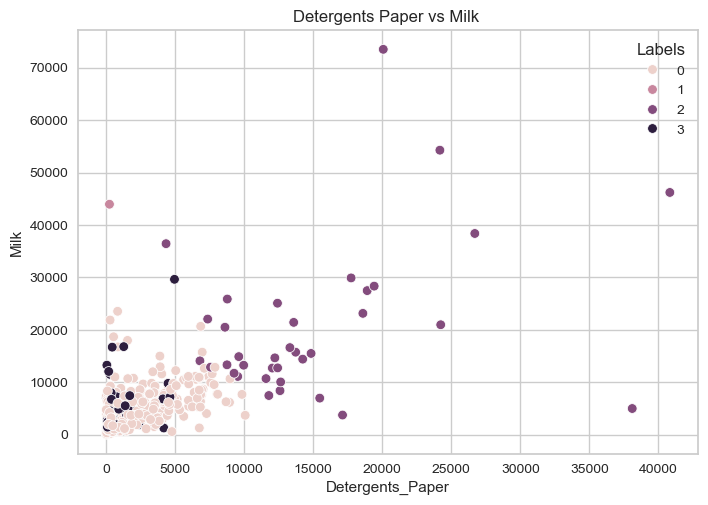

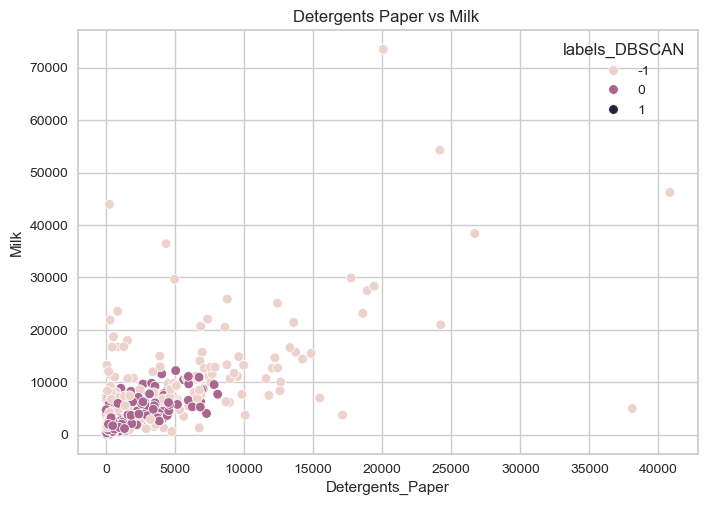

In [65]:
plot(sales['Detergents_Paper'], sales['Milk'], sales['Labels'])
plot(sales['Detergents_Paper'], sales['Milk'], sales['labels_DBSCAN'])


Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

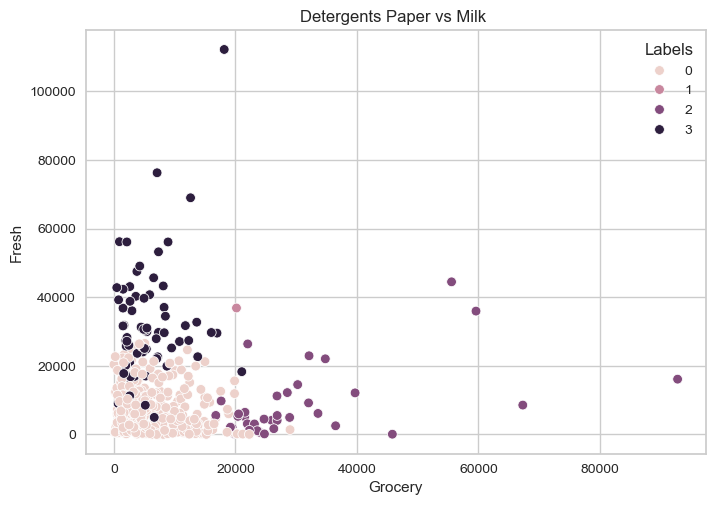

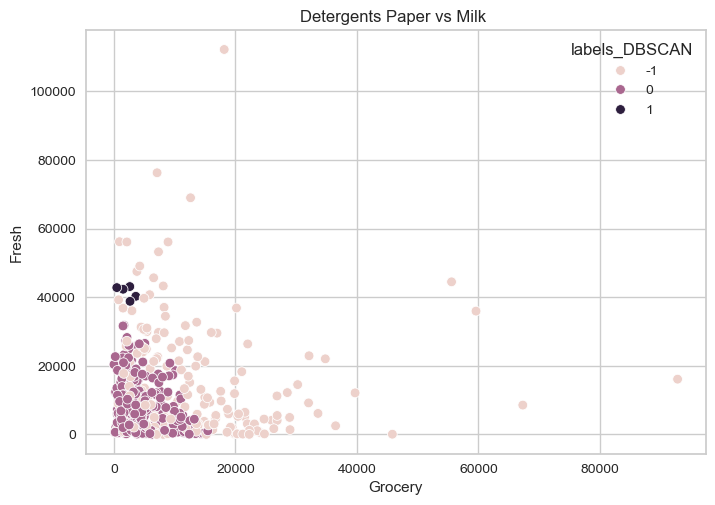

In [68]:
# Visualize Grocery as X and Fresh as Y using labels and labels_DBSCAN, respectively.
plot(sales['Grocery'], sales['Fresh'], sales['Labels'])
plot(sales['Grocery'], sales['Fresh'], sales['labels_DBSCAN'])


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

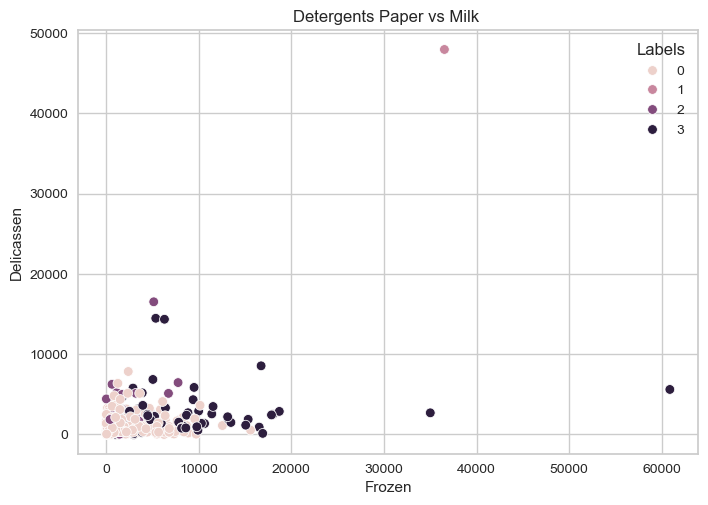

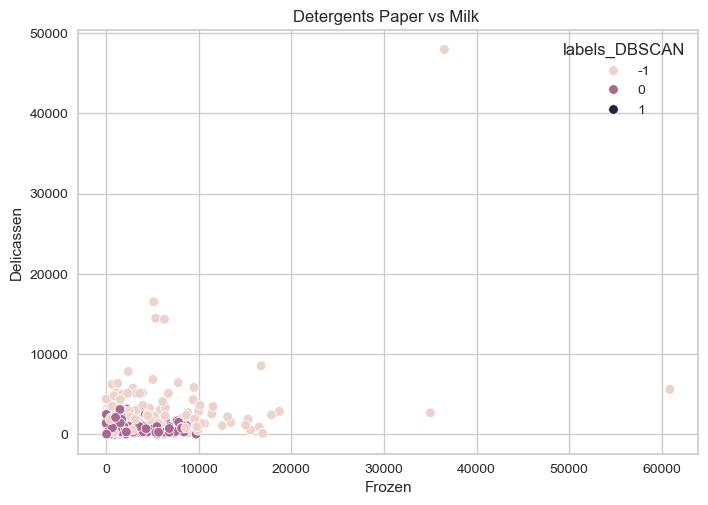

In [71]:
plot(sales['Frozen'], sales['Delicassen'], sales['Labels'])
plot(sales['Frozen'], sales['Delicassen'], sales['labels_DBSCAN'])

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [74]:
mean_labels = sales.groupby(['Labels']).mean()
mean_labels_DBSCAN = sales.groupby(['labels_DBSCAN']).mean()

print(mean_labels)
print(mean_labels_DBSCAN)

         Channel    Region         Fresh          Milk       Grocery  \
Labels                                                                 
0       1.290419  2.532934   8133.640719   4287.757485   5889.137725   
1       1.000000  3.000000  36847.000000  43950.000000  20170.000000   
2       2.000000  2.416667   8921.166667  20531.055556  30935.666667   
3       1.130435  2.652174  31963.565217   4857.652174   5764.289855   

              Frozen  Detergents_Paper    Delicassen     Label  labels_DBSCAN  
Labels                                                                         
0        2055.464072       1982.299401   1087.577844  0.000000      -0.248503  
1       36534.000000        239.000000  47943.000000  1.000000      -1.000000  
2        1945.611111      14978.638889   2505.277778  0.916667      -1.000000  
3        8094.913043        960.855072   2457.376812  0.014493      -0.710145  
                Channel    Region         Fresh          Milk       Grocery  \
labels_D

¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [79]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scaled)
labels_2 = kmeans_1.predict(customers_scaled)
clusters_2 = kmeans_2.labels_.tolist()
sales['Label_n2'] = clusters_2

plot(sales['Detergents_Paper'], sales['Milk'], sales['Label_n2'])
plot(sales['Grocery'], sales['Fresh'], sales['Label_n2'])
plot(sales['Frozen'], sales['Delicassen'], sales['Label_n2'])

C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


NameError: name 'kmeans_1' is not defined

C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


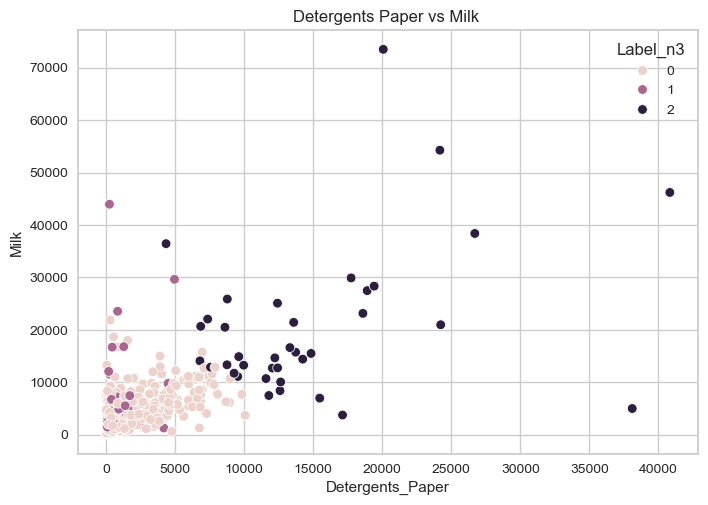

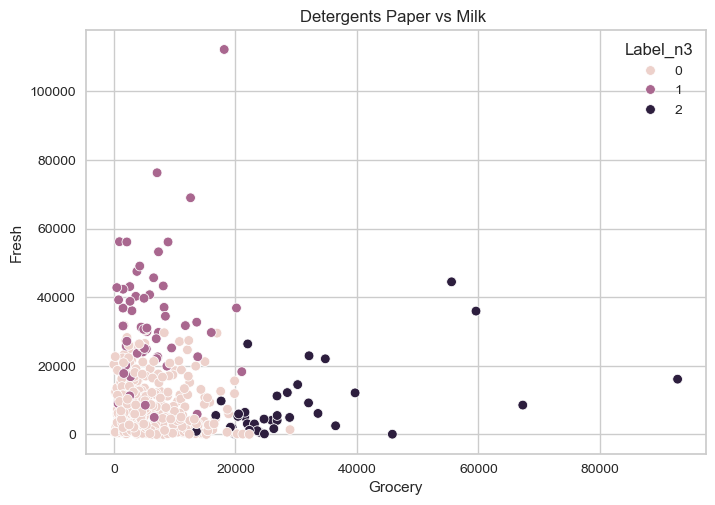

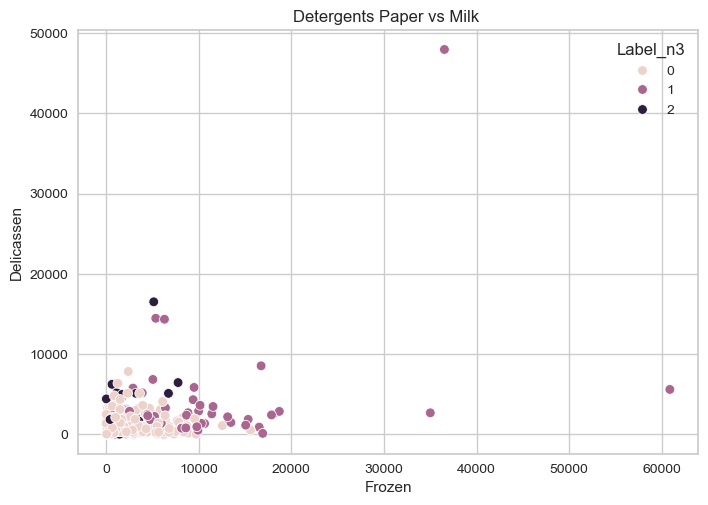

In [81]:
kmeans_3 = KMeans(n_clusters=3).fit(customers_scaled)
labels_3 = kmeans_3.predict(customers_scaled)
clusters_3 = kmeans_3.labels_.tolist()
sales['Label_n3'] = clusters_3

plot(sales['Detergents_Paper'], sales['Milk'], sales['Label_n3'])
plot(sales['Grocery'], sales['Fresh'], sales['Label_n3'])
plot(sales['Frozen'], sales['Delicassen'], sales['Label_n3'])

C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


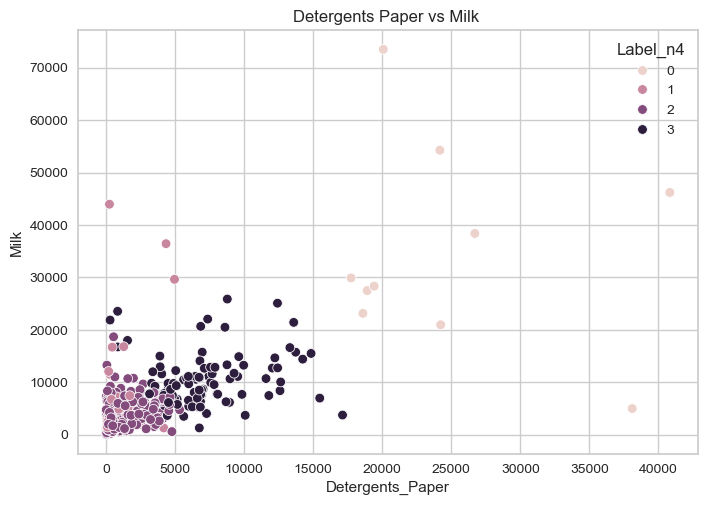

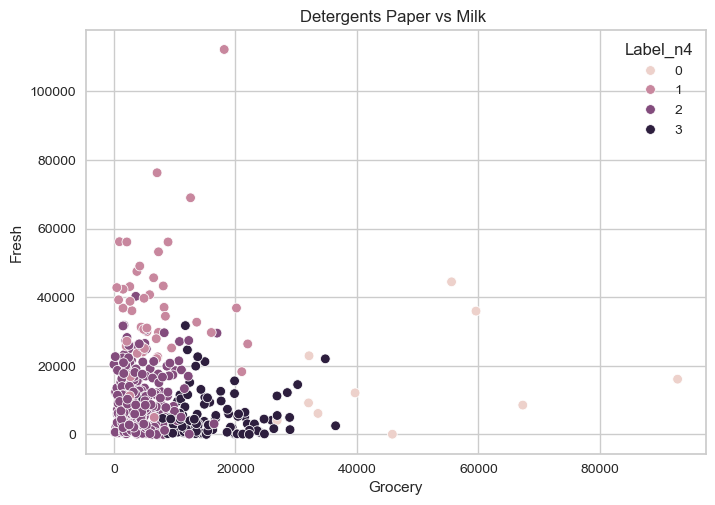

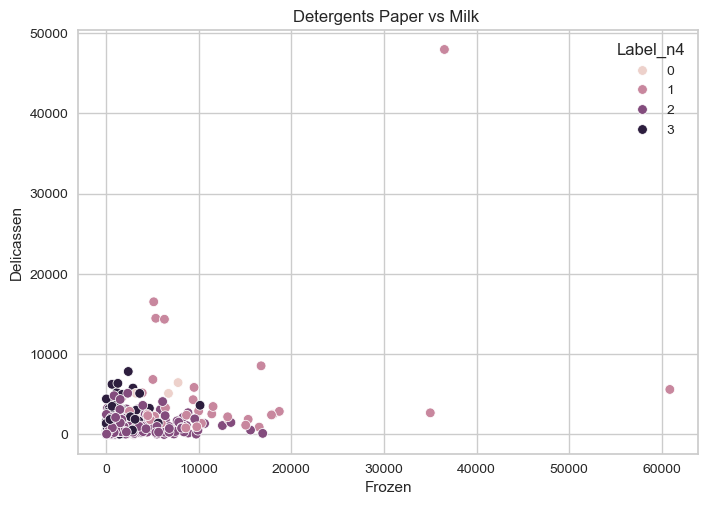

In [82]:
kmeans_4 = KMeans(n_clusters=4).fit(customers_scaled)
labels_4 = kmeans_4.predict(customers_scaled)
clusters_4 = kmeans_4.labels_.tolist()
sales['Label_n4'] = clusters_4

plot(sales['Detergents_Paper'], sales['Milk'], sales['Label_n4'])
plot(sales['Grocery'], sales['Fresh'], sales['Label_n4'])
plot(sales['Frozen'], sales['Delicassen'], sales['Label_n4'])

C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


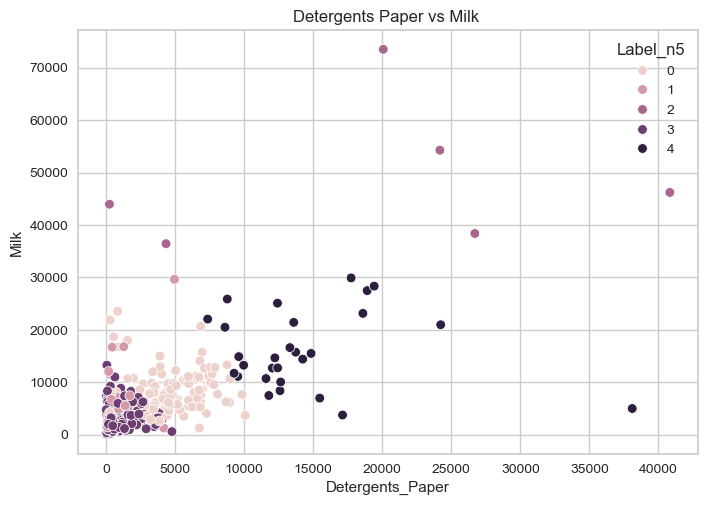

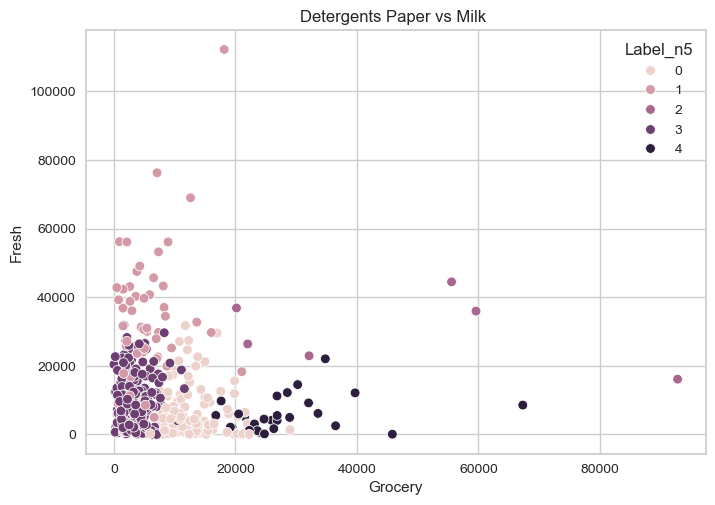

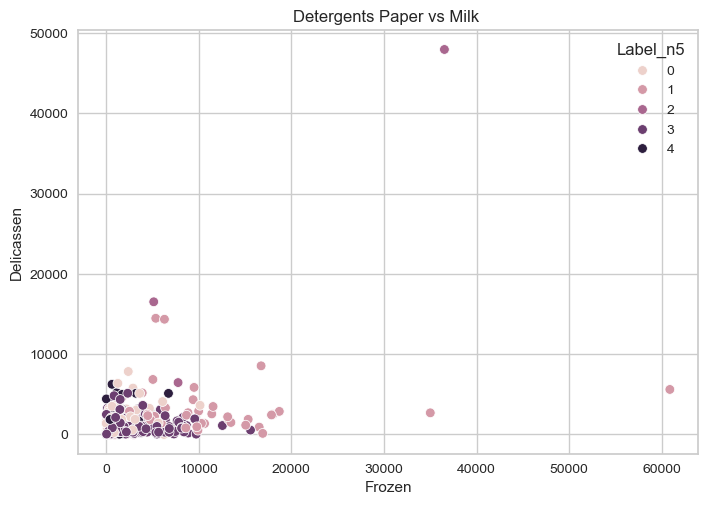

In [84]:
kmeans_5 = KMeans(n_clusters=5).fit(customers_scaled)
labels_5 = kmeans_5.predict(customers_scaled)
clusters_5  = kmeans_5.labels_.tolist()
sales['Label_n5'] = clusters_5

plot(sales['Detergents_Paper'], sales['Milk'], sales['Label_n5'])
plot(sales['Grocery'], sales['Fresh'], sales['Label_n5'])
plot(sales['Frozen'], sales['Delicassen'], sales['Label_n5'])

C:\Users\ievav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


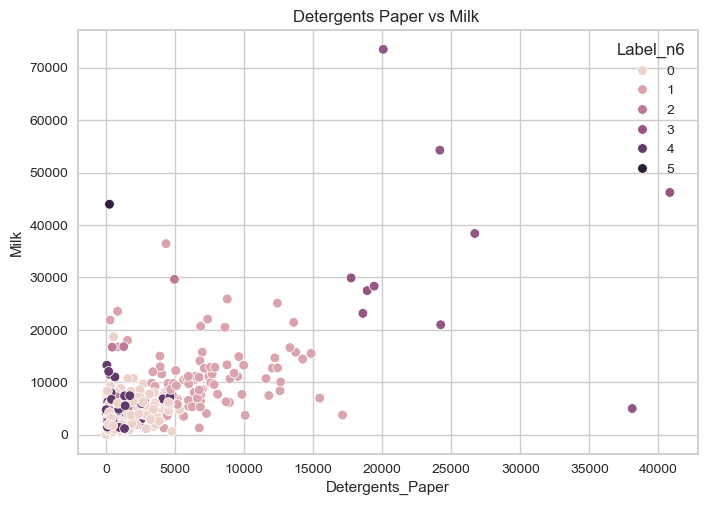

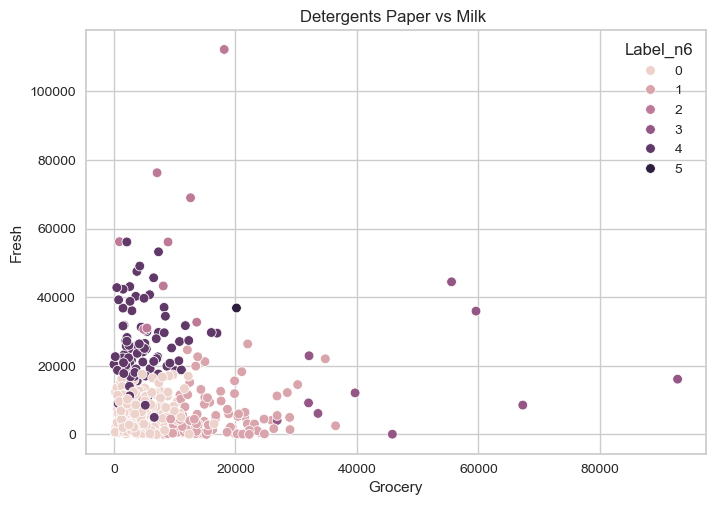

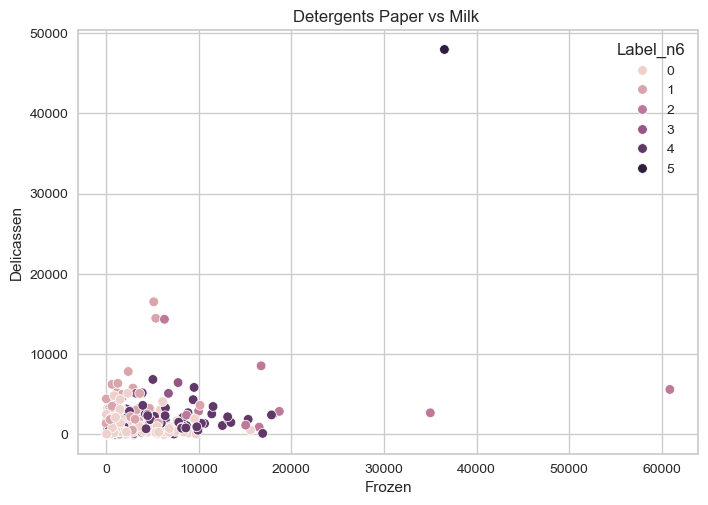

In [85]:
kmeans_6 = KMeans(n_clusters=6).fit(customers_scaled)
labels_6 = kmeans_6.predict(customers_scaled)
clusters_6  = kmeans_6.labels_.tolist()
sales['Label_n6'] = clusters_6

plot(sales['Detergents_Paper'], sales['Milk'], sales['Label_n6'])
plot(sales['Grocery'], sales['Fresh'], sales['Label_n6'])
plot(sales['Frozen'], sales['Delicassen'], sales['Label_n6'])

**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

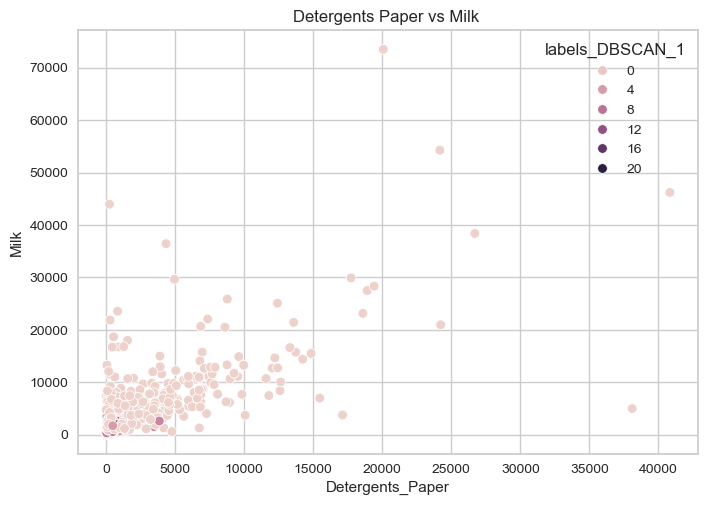

In [90]:
dbscan_1 = DBSCAN(eps=0.2, min_samples=2)
sales['labels_DBSCAN_1'] = dbscan_1.fit_predict(customers_scaled)
plot(sales['Detergents_Paper'], sales['Milk'], sales['labels_DBSCAN_1'])

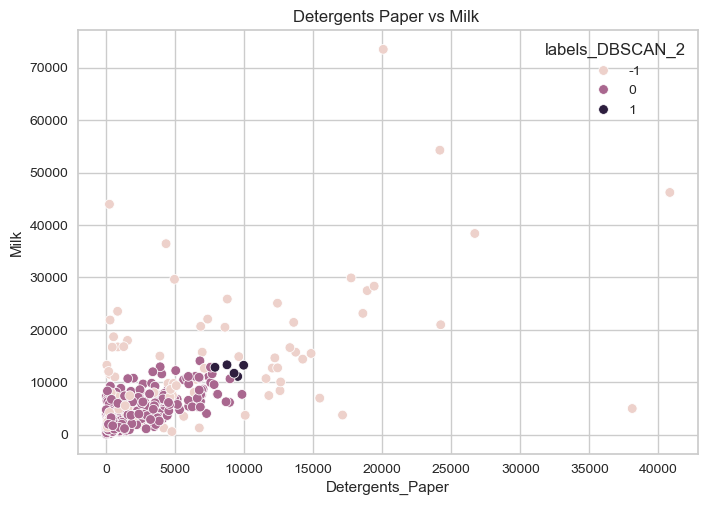

In [92]:
dbscan_2 = DBSCAN(eps=0.7, min_samples=7)
sales['labels_DBSCAN_2'] = dbscan_2.fit_predict(customers_scaled)
plot(sales['Detergents_Paper'], sales['Milk'], sales['labels_DBSCAN_2'])

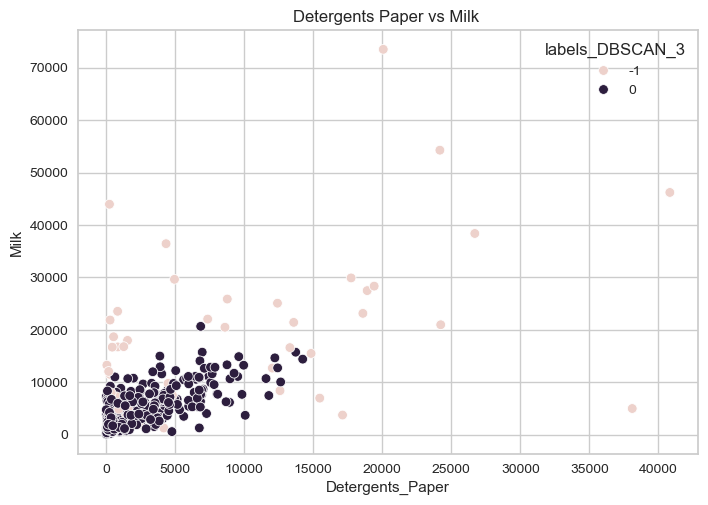

In [95]:
dbscan_3 = DBSCAN(eps=1, min_samples=10)
sales['labels_DBSCAN_3'] = dbscan_3.fit_predict(customers_scaled)
plot(sales['Detergents_Paper'], sales['Milk'], sales['labels_DBSCAN_3'])

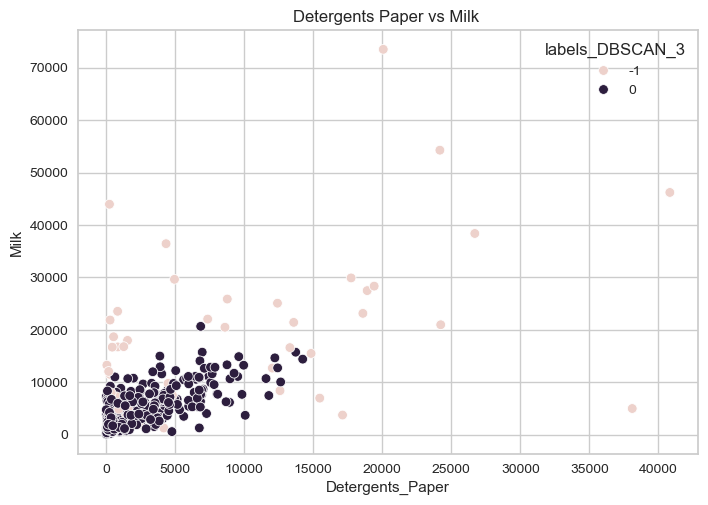

In [97]:
dbscan_4 = DBSCAN(eps=10000, min_samples=200000)
sales['labels_DBSCAN_4'] = dbscan_4.fit_predict(customers_scaled)
plot(sales['Detergents_Paper'], sales['Milk'], sales['labels_DBSCAN_3'])

**Tus observaciones aquí**

 In DBSCAN, the min_samples parameter defines the minimum number of points required to form a dense region. As you increase min_samples, the algorithm becomes stricter in defining dense regions. This can result in fewer clusters because:

    * Fewer dense regions: Some regions that were previously considered dense might no longer meet the higher min_samples threshold, so they won't form clusters.
    * More noise points: Points that were previously part of smaller clusters might be classified as noise since they no longer belong to any dense region.
    * Thus, increasing min_samples generally leads to fewer and larger clusters, as well as more noise points.

The parameter eps in DBSCAN defines the maximum distance between two points for them to be considered as part of the same neighborhood. Changing eps has a significant impact on the number of clusters:

Increasing eps:

The algorithm considers points farther apart as part of the same neighborhood.
This can lead to the merging of clusters, resulting in fewer and larger clusters.
More points are likely to be included in clusters, reducing the number of noise points.
